# Name: Siwani Karna
# Reg No. : BL.EN.U4CSE21191

# Loading Data 

In [33]:
import pandas as pd
import numpy as np
# Define the data as a list of dictionaries
data = [
    {'age': '<=30', 'income': 'high', 'student': 'no', 'credit_rating': 'fair', 'buys_computer': 'no'},
    {'age': '<=30', 'income': 'high', 'student': 'no', 'credit_rating': 'excellent', 'buys_computer': 'no'},
    {'age': '31…40', 'income': 'high', 'student': 'no', 'credit_rating': 'fair', 'buys_computer': 'yes'},
    {'age': '>40', 'income': 'medium', 'student': 'no', 'credit_rating': 'fair', 'buys_computer': 'yes'},
    {'age': '>40', 'income': 'low', 'student': 'yes', 'credit_rating': 'fair', 'buys_computer': 'yes'},
    {'age': '>40', 'income': 'low', 'student': 'yes', 'credit_rating': 'excellent', 'buys_computer': 'no'},
    {'age': '31…40', 'income': 'low', 'student': 'yes', 'credit_rating': 'excellent', 'buys_computer': 'yes'},
    {'age': '<=30', 'income': 'medium', 'student': 'no', 'credit_rating': 'fair', 'buys_computer': 'no'},
    {'age': '<=30', 'income': 'low', 'student': 'yes', 'credit_rating': 'fair', 'buys_computer': 'yes'},
    {'age': '>40', 'income': 'medium', 'student': 'yes', 'credit_rating': 'fair', 'buys_computer': 'yes'},
    {'age': '<=30', 'income': 'medium', 'student': 'yes', 'credit_rating': 'excellent', 'buys_computer': 'yes'},
    {'age': '31…40', 'income': 'medium', 'student': 'no', 'credit_rating': 'excellent', 'buys_computer': 'yes'},
    {'age': '31…40', 'income': 'high', 'student': 'yes', 'credit_rating': 'fair', 'buys_computer': 'yes'},
    {'age': '>40', 'income': 'medium', 'student': 'no', 'credit_rating': 'excellent', 'buys_computer': 'no'}
]

# Create a DataFrame from the data
dataset = pd.DataFrame(data)

# Print the DataFrame
print(dataset)


      age  income student credit_rating buys_computer
0    <=30    high      no          fair            no
1    <=30    high      no     excellent            no
2   31…40    high      no          fair           yes
3     >40  medium      no          fair           yes
4     >40     low     yes          fair           yes
5     >40     low     yes     excellent            no
6   31…40     low     yes     excellent           yes
7    <=30  medium      no          fair            no
8    <=30     low     yes          fair           yes
9     >40  medium     yes          fair           yes
10   <=30  medium     yes     excellent           yes
11  31…40  medium      no     excellent           yes
12  31…40    high     yes          fair           yes
13    >40  medium      no     excellent            no


In [34]:
dataset.to_csv("student_purchase_behaviour.csv",index=False)

In [35]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply LabelEncoder to the 'age' column
dataset['age'] = label_encoder.fit_transform(dataset['age'])

# Print the DataFrame with the 'age' column encoded
print(dataset)


    age  income student credit_rating buys_computer
0     1    high      no          fair            no
1     1    high      no     excellent            no
2     0    high      no          fair           yes
3     2  medium      no          fair           yes
4     2     low     yes          fair           yes
5     2     low     yes     excellent            no
6     0     low     yes     excellent           yes
7     1  medium      no          fair            no
8     1     low     yes          fair           yes
9     2  medium     yes          fair           yes
10    1  medium     yes     excellent           yes
11    0  medium      no     excellent           yes
12    0    high     yes          fair           yes
13    2  medium      no     excellent            no


In [36]:
# Display the first five rows of the DataFrame
print(dataset.head())

   age  income student credit_rating buys_computer
0    1    high      no          fair            no
1    1    high      no     excellent            no
2    0    high      no          fair           yes
3    2  medium      no          fair           yes
4    2     low     yes          fair           yes


In [37]:
# Display the last five rows of the DataFrame
print(dataset.tail())

    age  income student credit_rating buys_computer
9     2  medium     yes          fair           yes
10    1  medium     yes     excellent           yes
11    0  medium      no     excellent           yes
12    0    high     yes          fair           yes
13    2  medium      no     excellent            no


# A1. For the data table provided below, calculate the entropy associated with each attribute / feature at the root node. Using this information, identify the first feature that you’d select for constructing the decision tree. Use Information Gain as the impurity measure to identify the root node. ‘buys_computer’ is the class label.


In [38]:
import math

# Calculate entropy for the 'buys_computer' target attribute
def calculate_entropy(data):
    entropy = 0
    total_samples = len(data)
    unique_classes = data['buys_computer'].unique()

    for class_label in unique_classes:
        class_prob = (data['buys_computer'] == class_label).sum() / total_samples
        entropy -= class_prob * math.log2(class_prob)

    return entropy

# Calculate entropy for the entire dataset
entropy_root = calculate_entropy(dataset)

# Calculate Information Gain for each feature
def calculate_information_gain(data, feature):
    unique_values = data[feature].unique()
    weighted_entropy = 0

    for value in unique_values:
        subset = data[data[feature] == value]
        subset_probability = len(subset) / len(data)
        weighted_entropy += subset_probability * calculate_entropy(subset)

    return entropy_root - weighted_entropy

# Define the list of features to calculate Information Gain for
features = ['age', 'income', 'student', 'credit_rating']

# Calculate Information Gain for each feature and store in a dictionary
information_gains = {feature: calculate_information_gain(dataset, feature) for feature in features}

# Find the feature with the highest Information Gain
best_splitting_feature = max(information_gains, key=information_gains.get)

print("Information Gains:")
print(information_gains)
print("The best splitting feature for the decision tree is:", best_splitting_feature)


Information Gains:
{'age': 0.24674981977443933, 'income': 0.02922256565895487, 'student': 0.15183550136234159, 'credit_rating': 0.04812703040826949}
The best splitting feature for the decision tree is: age


# A2. Create a Decision Tree for the above data. Get the depth of the constructed tree.

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X_features = dataset.drop('buys_computer', axis=1)
y_target = dataset['buys_computer']

# Perform one-hot encoding for categorical features
X_encoded = pd.get_dummies(X_features)

# Create a DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_target, test_size=0.2)

# Fit the model to the training data
decision_tree_model.fit(X_train, y_train)

# Get the training set accuracy
training_accuracy = decision_tree_model.score(X_train, y_train)
print("Training Set Accuracy:", training_accuracy)

# Get the depth of the constructed tree
tree_depth = decision_tree_model.get_depth()
print("Tree Depth:", tree_depth)


Training Set Accuracy: 1.0
Tree Depth: 4


# A3 Visualize the constructed tree with plot_tree() command.

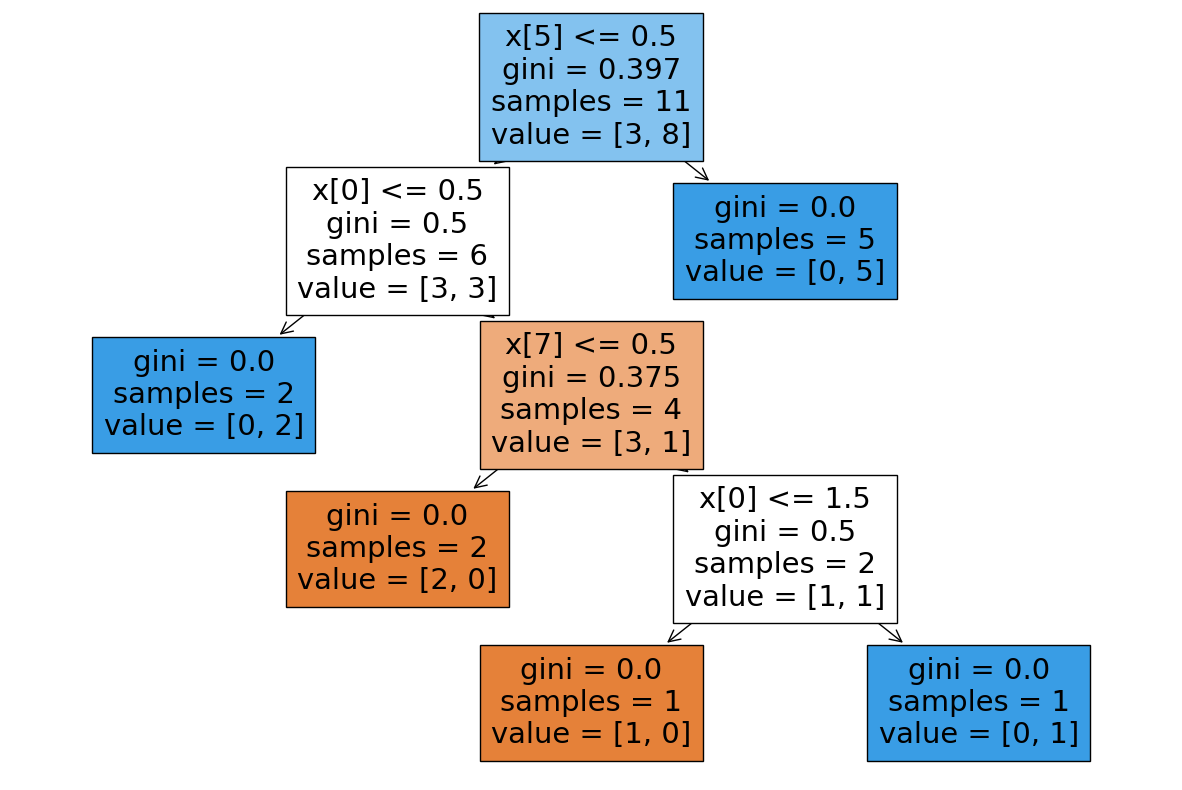

In [42]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Create a DecisionTreeClassifier model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)  # Make sure you have already split and prepared your data

plt.figure(figsize=(15, 10))  # Adjust the figsize as needed
# Plot the decision tree with filled nodes
plot_tree(decision_tree_model, filled=True)
plt.show()

# A4. Create a Decision Tree classifier on your project data. Study the accuracy for training and test data and infer the accuracy of tree construction. Plot the Decision Tree obtained above. Below code for help.

Training Set Accuracy: 1.0
Test Set Accuracy: 0.8461538461538461


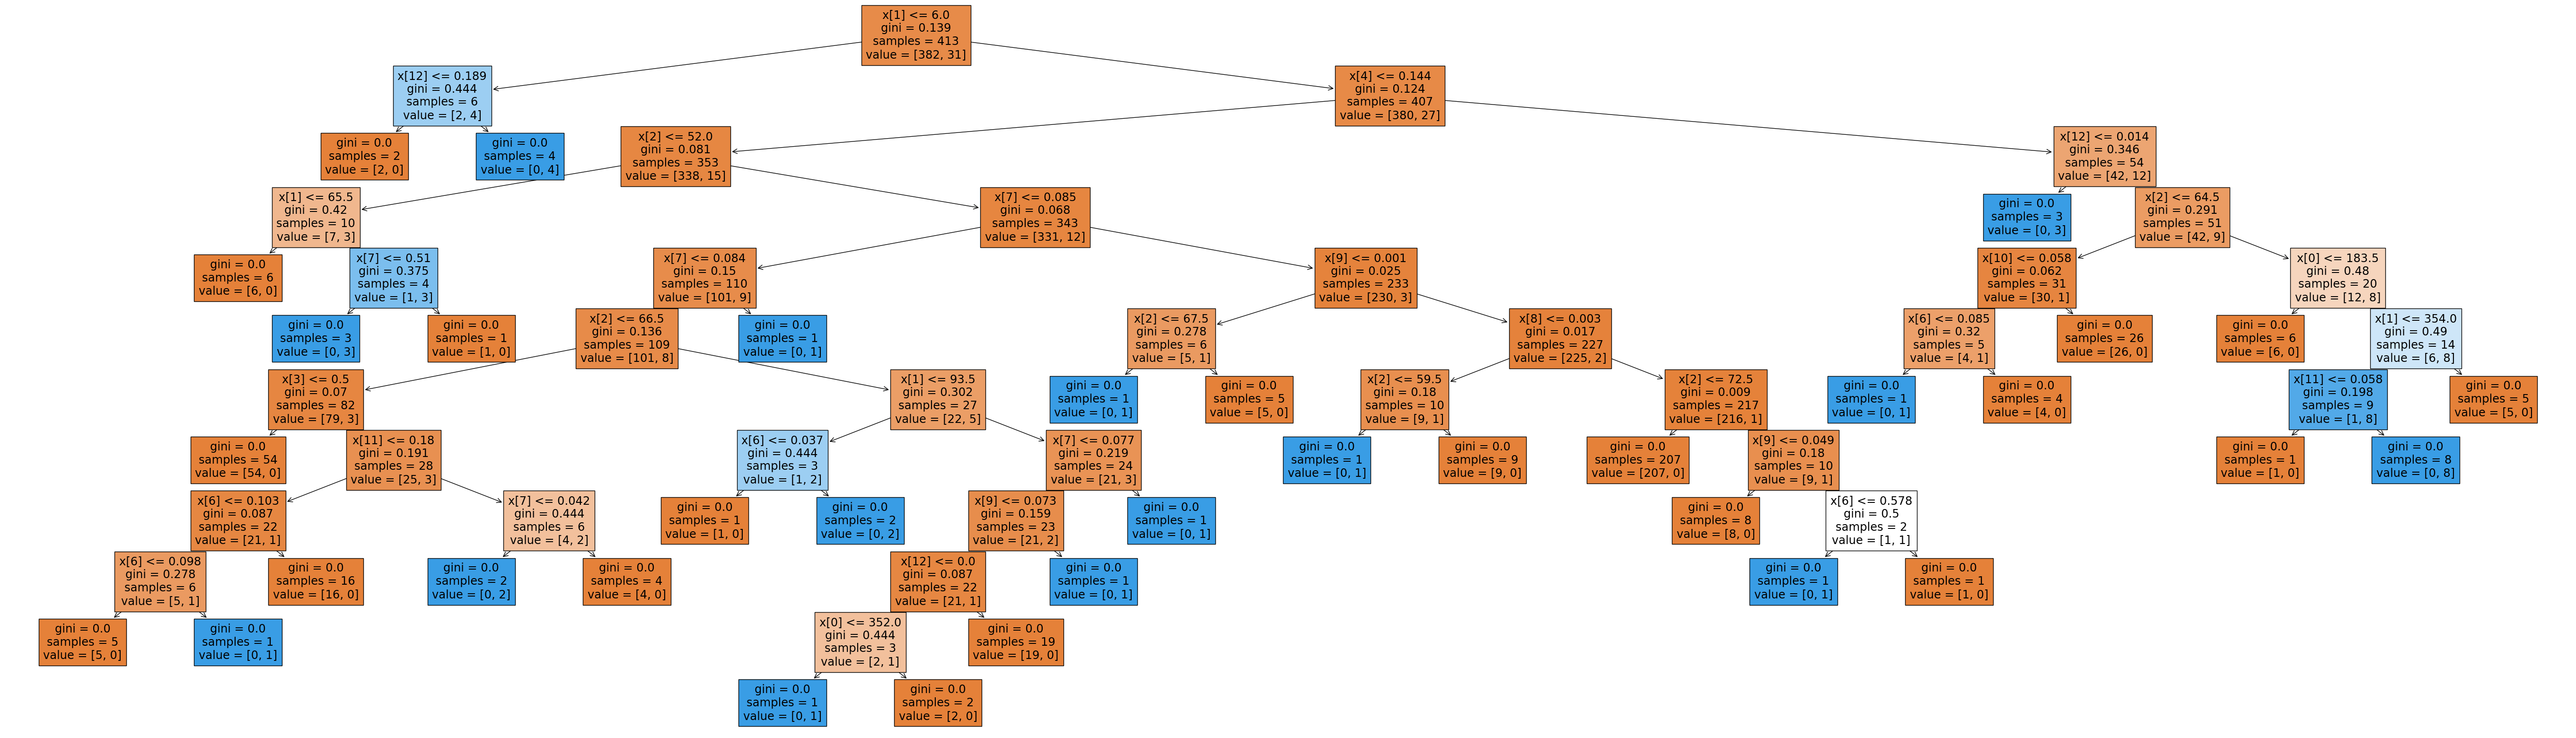

In [48]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

data = pd.read_csv('face_mimic_df.csv')

# Separate features (X) and target (y)
X_features = data.drop('diagnosed', axis=1)
y_target = data['diagnosed']

# Encode the 'id' column using LabelEncoder (if applicable)
label_encoder = LabelEncoder()
data['id'] = label_encoder.fit_transform(data['id'])

# Create a DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()

# Split the data into features (X) and target (y), further into training and testing sets
X_features = data.drop('diagnosed', axis=1)
y_target = data['diagnosed']
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2)

# Fit the decision tree model to the training data
decision_tree_model.fit(X_train, y_train)

# Calculate training set accuracy
training_accuracy = decision_tree_model.score(X_train,y_train)

# Calculate test set accuracy
test_accuracy = decision_tree_model.score(X_test,y_test)

# Print accuracy results
print("Training Set Accuracy:", training_accuracy)
print("Test Set Accuracy:", test_accuracy)

# Plot the Decision Tree
plt.figure(figsize=(70, 20))  # Adjust the figsize as needed
plot_tree(decision_tree_model, filled=True)
plt.show()


# A5. Impose a max_depth constraint on the tree construction. Construct the tree again and check the accuracies. Visualize the tree constructed with max_depth constraint

Training Set Accuracy (max_depth=5): 0.96
Test Set Accuracy (max_depth=5): 0.91


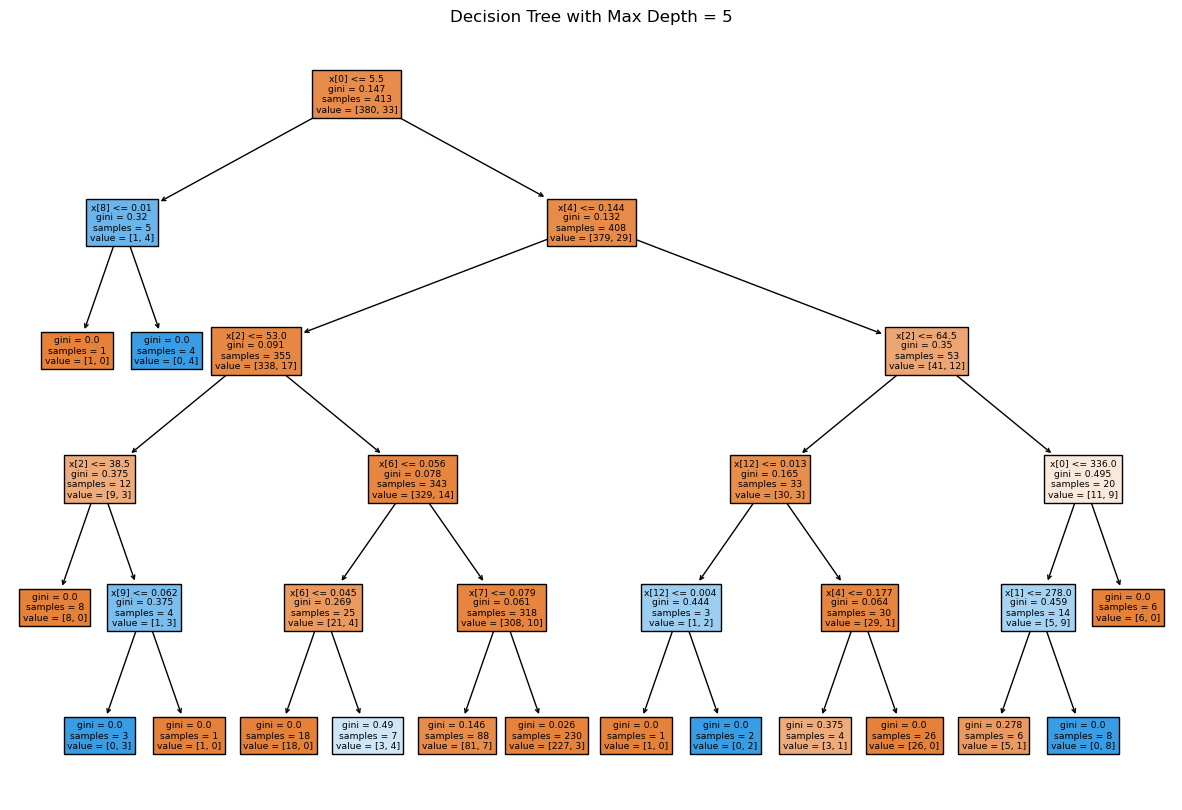

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load your dataset (replace 'face_mimic_df.csv' with your actual file path)
data = pd.read_csv('face_mimic_df.csv')

# Separate features (X) and target (y)
X_features = data.drop('diagnosed', axis=1)  # Replace 'diagnosed' with any target column name
y_target = data['diagnosed']

# Encode the 'id' column using LabelEncoder
label_encoder = LabelEncoder()
data['id'] = label_encoder.fit_transform(data['id'])

# Create a DecisionTreeClassifier with max_depth constraint
max_tree_depth = 5
decision_tree_model = DecisionTreeClassifier(max_depth=max_tree_depth)

# Split the data into features (X) and target (y), further into training and testing sets
X_features = data.drop('diagnosed', axis=1) 
y_target = data['diagnosed']
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2)

# Fit the decision tree model to the training data
decision_tree_model.fit(X_train, y_train)

# Predict on training and test data
train_predictions = decision_tree_model.predict(X_train)
test_predictions = decision_tree_model.predict(X_test)

# Calculate training and test accuracies
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print accuracy results
print(f"Training Set Accuracy (max_depth={max_tree_depth}): {train_accuracy:.2f}")
print(f"Test Set Accuracy (max_depth={max_tree_depth}): {test_accuracy:.2f}")

# Plot the Decision Tree with max_depth constraint
plt.figure(figsize=(15, 10))
plot_tree(decision_tree_model, filled=True)
plt.title(f"Decision Tree with Max Depth = {max_tree_depth}")
plt.show()


# A6. Study the criterion of the DT in the above model. Change the criterion to “Entropy” and studythe model & graph. Find the differences between the default criterion and entropy criterion. 

Decision Tree with Criterion: Entropy
Training Set Accuracy: 1.00
Test Set Accuracy: 0.90


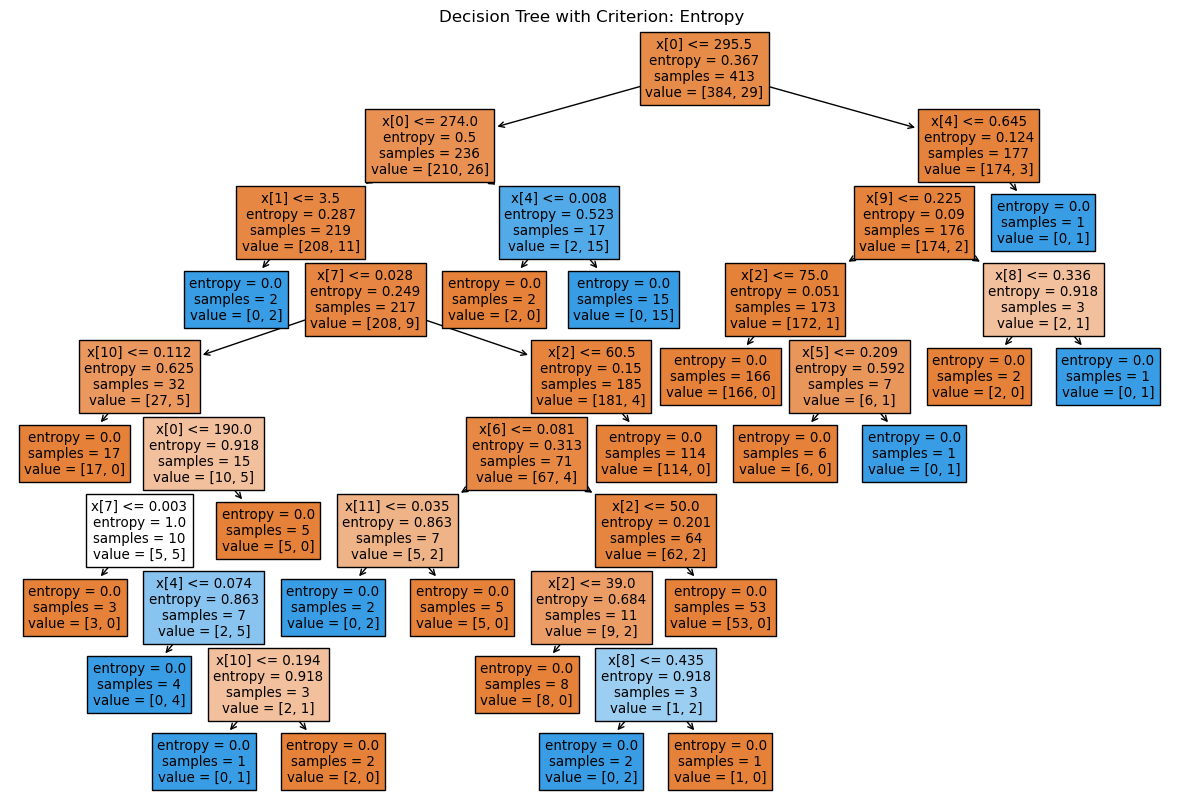

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load your dataset (replace 'face_mimic_df.csv' with your actual file path)
data = pd.read_csv('face_mimic_df.csv')
# Create a DecisionTreeClassifier with criterion="entropy"
decision_tree_model = DecisionTreeClassifier(criterion="entropy")

# Split the data into features (X) and target (y), further into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2)

# Fit the decision tree model to the training data
decision_tree_model.fit(X_train, y_train)

# Predict on training and test data
train_predictions = decision_tree_model.predict(X_train)
test_predictions = decision_tree_model.predict(X_test)

# Calculate training and test accuracies
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print results
print("Decision Tree with Criterion: Entropy")
print(f"Training Set Accuracy: {train_accuracy:.2f}")
print(f"Test Set Accuracy: {test_accuracy:.2f}")

# Plot the Decision Tree with "Entropy" criterion
plt.figure(figsize=(15, 10))
plot_tree(decision_tree_model, filled=True)
plt.title("Decision Tree with Criterion: Entropy")
plt.show()

# A7. Construct a random forest classifier on your project data. Find the differences between the decision tree & random forest classifiers with the help of the performance metrics.

In [61]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Load your project data into a DataFrame (replace 'face_mimic_df.csv' with your actual file path)
data = pd.read_csv('face_mimic_df.csv')

# Encode the 'id' column using LabelEncoder
label_encoder = LabelEncoder()
data['id'] = label_encoder.fit_transform(data['id'])  

# Separate features (X) and target (y)
X_features = data.drop('diagnosed', axis=1)  # Replace 'diagnosed' with any target column name
y_target = data['diagnosed']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2)

# Create a Decision Tree classifier
decision_tree_model = DecisionTreeClassifier()

# Fit the Decision Tree model to the training data
decision_tree_model.fit(X_train, y_train)

# Predict on test data using Decision Tree
decision_tree_predictions = decision_tree_model.predict(X_test)

# Calculate performance metrics for Decision Tree
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
decision_tree_precision = precision_score(y_test, decision_tree_predictions)
decision_tree_recall = recall_score(y_test, decision_tree_predictions)
decision_tree_f1 = f1_score(y_test, decision_tree_predictions)

# Create a Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model to the training data
random_forest_model.fit(X_train, y_train)

# Predict on test data using Random Forest
random_forest_predictions = random_forest_model.predict(X_test)

# Calculate performance metrics for Random Forest
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_precision = precision_score(y_test, random_forest_predictions)
random_forest_recall = recall_score(y_test, random_forest_predictions)
random_forest_f1 = f1_score(y_test, random_forest_predictions)

# Print performance metrics for both models
print("Decision Tree Metrics:")
print(f"Accuracy: {decision_tree_accuracy:.2f}")
print(f"Precision: {decision_tree_precision:.2f}")
print(f"Recall: {decision_tree_recall:.2f}")
print(f"F1-score: {decision_tree_f1:.2f}")

print("\nRandom Forest Metrics:")
print(f"Accuracy: {random_forest_accuracy:.2f}")
print(f"Precision: {random_forest_precision:.2f}")
print(f"Recall: {random_forest_recall:.2f}")
print(f"F1-score: {random_forest_f1:.2f}")


Decision Tree Metrics:
Accuracy: 0.93
Precision: 0.25
Recall: 0.67
F1-score: 0.36

Random Forest Metrics:
Accuracy: 0.98
Precision: 1.00
Recall: 0.33
F1-score: 0.50
